# Pré-processamento de dados: limpeza, normalização e transformação

# 1 Importação das bibliotecas necessárias

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Carregamento do dataset

O dataset "Heart Disease" contém informações médicas de pacientes, coletadas para estudar a presença de doenças cardíacas. Ele possui 14 atributos, que são:

- Principais Características do Dataset:
    - age: Idade
    - sex: Sexo (1 = masculino, 0 = feminino)
    - cp: Tipo de dor no peito (1 a 4)
    - trestbps: Pressão arterial em repouso
    - chol: Colesterol sérico em mg/dl
    - fbs: Açúcar no sangue em jejum (1 = verdadeiro, 0 = falso)
    - restecg: Resultados do eletrocardiograma em repouso (0 a 2)
    - thalach: Frequência cardíaca máxima atingida
    - exang: Angina induzida por exercício (1 = sim, 0 = não)
    - oldpeak: Depressão do segmento ST induzida por exercício em relação ao repouso
    - slope: Inclinação do segmento ST no pico do exercício (1 a 3)
    - ca: Número de vasos principais (0-3) coloridos por fluoroscopia
    - thal: Talassemia (3 = normal, 6 = fixo, 7 = reversível)
    - target: Diagnóstico de doença cardíaca (0 = ausência, 1 a 4 = presença)

- Importância das Variáveis:
    - age: A idade é um fator de risco importante para doenças cardíacas.
    - sex: O sexo pode influenciar a probabilidade de doenças cardíacas.
    - cp: O tipo de dor no peito fornece informações sobre possíveis condições cardíacas.
    - trestbps: A pressão arterial elevada pode estar associada a doenças cardíacas.
    - chol: Níveis altos de colesterol estão relacionados a um maior risco de doenças cardíacas.
    - fbs: A presença de açúcar no sangue em jejum é um fator de risco para doenças cardíacas.
    - restecg: Anomalidades no eletrocardiograma em repouso podem indicar problemas cardíacos.
    - thalach: Uma frequência cardíaca máxima baixa pode estar associada a problemas cardíacos.
    - exang: A angina induzida por exercício pode ser um sinal de doença cardíaca.
    - oldpeak: A depressão do segmento ST pode indicar isquemia cardíaca.
    - slope: A inclinação do segmento ST pode fornecer informações adicionais sobre a gravidade da doença.
    - ca: O número de vasos coloridos pode indicar a presença de doença arterial coronariana.
    - thal: Diferentes tipos de talassemia podem influenciar o risco de doenças cardíacas.
    - target: A variável alvo indica a presença ou ausência de doenças cardíacas e é a principal variável para predição.

- Fonte do Dataset
    - O dataset está originalmente disponível em: UCI Machine Learning Repository
    - Para carregar o dataset em um DataFrame do pandas:

        import pandas as pd

        url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

        df = pd.read_csv(url, delimiter=';')

In [36]:
df = pd.read_csv('datasets/heart_disease.csv', delimiter=",")

# 3 Análise inicial do dataset

## 3.1 Primeiras linhas do dataset

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,?,145.0,233.0,1.0,2.0,150.0,0.0,?,3.0,0.0,6.0,0
1,67.0,?,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,?,0.0,2.0,129.0,?,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,?,?,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3.2 Informações do dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    object
 1   sex       303 non-null    object
 2   cp        303 non-null    object
 3   trestbps  303 non-null    object
 4   chol      303 non-null    object
 5   fbs       303 non-null    object
 6   restecg   303 non-null    object
 7   thalach   303 non-null    object
 8   exang     303 non-null    object
 9   oldpeak   303 non-null    object
 10  slope     303 non-null    object
 11  ca        299 non-null    object
 12  thal      301 non-null    object
 13  target    303 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 33.3+ KB


In [39]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

## 3.3 Estatísticas descritivas do dataset

In [40]:
df.describe()

,target
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


# 4 Limpeza de dados

## 4.1 Substituição dos valores faltantes (representados por '?')

In [41]:
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)

In [42]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,NaN,145.0,233.0,1.0,2.0,150.0,0.0,NaN,3.0,0.0,6.0,0
1,67.0,NaN,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,NaN,0.0,2.0,129.0,NaN,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,NaN,NaN,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,NaN,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,NaN,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,NaN,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,NaN,3.0,1


## 4.2 Imputação dos valores faltantes com a média da coluna

In [43]:
imputer    = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,2.0,150.0,0.0,0.8,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,243.0,0.0,2.0,129.0,0.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,243.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [44]:
df_imputed = df.dropna()

In [45]:
imputer.get_params

<bound method BaseEstimator.get_params of SimpleImputer(strategy='median')>

## 4.3 Dataset após imputação de valores faltantes

In [46]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 3 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       70 non-null     float64
 1   sex       70 non-null     float64
 2   cp        70 non-null     float64
 3   trestbps  70 non-null     float64
 4   chol      70 non-null     float64
 5   fbs       70 non-null     float64
 6   restecg   70 non-null     float64
 7   thalach   70 non-null     float64
 8   exang     70 non-null     float64
 9   oldpeak   70 non-null     float64
 10  slope     70 non-null     float64
 11  ca        70 non-null     float64
 12  thal      70 non-null     float64
 13  target    70 non-null     int64  
dtypes: float64(13), int64(1)
memory usage: 8.2 KB


# 5 Normalização dos dados

In [47]:
# Separar a coluna target
target = df_imputed['target']
features = df_imputed.drop(columns=['target'])

In [48]:
# Escalar as features
scaler = StandardScaler(with_std=True)
scaled_features = scaler.fit_transform(features)

In [49]:
# Criar um DataFrame com as features escalonadas
df_scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.958674,0.654654,-0.162735,-0.063985,0.045707,-0.454859,-1.113605,1.719949,-0.816497,2.266303,2.26261,-0.659897,-0.916043
1,0.973473,-1.527525,0.872854,0.510241,0.424591,-0.454859,0.911132,0.448156,-0.816497,2.359075,2.26261,1.771303,-0.916043
2,0.387043,-1.527525,0.872854,-0.638212,2.234817,-0.454859,-1.113605,0.589466,1.224745,-0.424103,-0.96969,-0.659897,-0.916043
3,1.090758,0.654654,0.872854,-0.063985,0.129903,-0.454859,0.911132,-0.164189,-0.816497,0.318078,0.64646,0.555703,1.103579
4,-1.137673,0.654654,-1.198325,-0.638212,0.319345,-0.454859,-1.113605,1.060501,-0.816497,-0.980739,-0.96969,-0.659897,1.103579


In [50]:

# Adicionar a coluna target de volta ao DataFrame
df_scaled = pd.concat([df_scaled_features, target.reset_index(drop=True)], axis=1)
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-1.958674,0.654654,-0.162735,-0.063985,0.045707,-0.454859,-1.113605,1.719949,-0.816497,2.266303,2.26261,-0.659897,-0.916043,0
1,0.973473,-1.527525,0.872854,0.510241,0.424591,-0.454859,0.911132,0.448156,-0.816497,2.359075,2.26261,1.771303,-0.916043,3
2,0.387043,-1.527525,0.872854,-0.638212,2.234817,-0.454859,-1.113605,0.589466,1.224745,-0.424103,-0.96969,-0.659897,-0.916043,0
3,1.090758,0.654654,0.872854,-0.063985,0.129903,-0.454859,0.911132,-0.164189,-0.816497,0.318078,0.64646,0.555703,1.103579,2
4,-1.137673,0.654654,-1.198325,-0.638212,0.319345,-0.454859,-1.113605,1.060501,-0.816497,-0.980739,-0.96969,-0.659897,1.103579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.152472,-1.527525,0.872854,-0.178831,-0.901504,-0.454859,-0.101237,-0.964948,1.224745,0.874713,0.64646,0.555703,1.103579,3
66,1.559902,0.654654,-0.162735,1.199313,-0.754161,-0.454859,0.911132,-0.022879,-0.816497,-0.238558,0.64646,-0.659897,1.103579,1
67,1.090758,0.654654,0.872854,0.510241,-1.280389,-0.454859,0.911132,-0.305500,1.224745,2.730166,-0.96969,1.771303,1.103579,2
68,0.621615,0.654654,0.872854,1.888385,-1.511929,2.198484,0.911132,-2.849087,-0.816497,-0.053013,0.64646,1.771303,0.598674,3


## 5.1 Dataset após normalização

In [51]:
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-1.958674,0.654654,-0.162735,-0.063985,0.045707,-0.454859,-1.113605,1.719949,-0.816497,2.266303,2.26261,-0.659897,-0.916043,0
1,0.973473,-1.527525,0.872854,0.510241,0.424591,-0.454859,0.911132,0.448156,-0.816497,2.359075,2.26261,1.771303,-0.916043,3
2,0.387043,-1.527525,0.872854,-0.638212,2.234817,-0.454859,-1.113605,0.589466,1.224745,-0.424103,-0.96969,-0.659897,-0.916043,0
3,1.090758,0.654654,0.872854,-0.063985,0.129903,-0.454859,0.911132,-0.164189,-0.816497,0.318078,0.64646,0.555703,1.103579,2
4,-1.137673,0.654654,-1.198325,-0.638212,0.319345,-0.454859,-1.113605,1.060501,-0.816497,-0.980739,-0.96969,-0.659897,1.103579,0


# Machine Learning Section

# 6 Separação dos dados brutos em treino e teste

In [52]:
X_raw = df_imputed.drop('target', axis=1)
y_raw = df_imputed['target']
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# 7 Modelo de Machine Learning com dados brutos

## 7.1 Treinamento com dados brutos

In [53]:
model_raw = LogisticRegression(random_state=42)
model_raw.fit(X_raw_train, y_raw_train)
y_pred_raw = model_raw.predict(X_raw_test)

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 7.2 Métricas de desempenho

In [54]:
accuracy_raw = accuracy_score(y_raw_test, y_pred_raw)
conf_matrix_raw = confusion_matrix(y_raw_test, y_pred_raw)

In [55]:
print("Acurácia do modelo com dados brutos:", accuracy_raw)

Acurácia do modelo com dados brutos: 0.5714285714285714


In [56]:
print("Matriz de confusão do modelo com dados brutos:")
print(conf_matrix_raw)

Matriz de confusão do modelo com dados brutos:
[[8 0 1 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]]


# 8 Separação dos dados tratados em treino e teste

In [57]:
X_treated = df_scaled.drop('target', axis=1)
y_treated = df_scaled['target']
X_treated_train, X_treated_test, y_treated_train, y_treated_test = train_test_split(X_treated, y_treated, test_size=0.2, random_state=42)

# 9 Modelo de Machine Learning com dados tratados

## 9.1 Treinamento com dados tratados

In [58]:
model_treated = LogisticRegression(random_state=42)
model_treated.fit(X_treated_train, y_treated_train)
y_pred_treated = model_treated.predict(X_treated_test)

## 9.2 Métricas de desempenho

In [59]:
accuracy_treated = accuracy_score(y_treated_test, y_pred_treated)
conf_matrix_treated = confusion_matrix(y_treated_test, y_pred_treated)
conf_matrix_treated

array([[9, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

In [60]:
print("Acurácia do modelo com dados tratados:", accuracy_treated)

Acurácia do modelo com dados tratados: 0.7142857142857143


# 10 Comparação de resultados

## 10.1 Plot da matriz de confusão

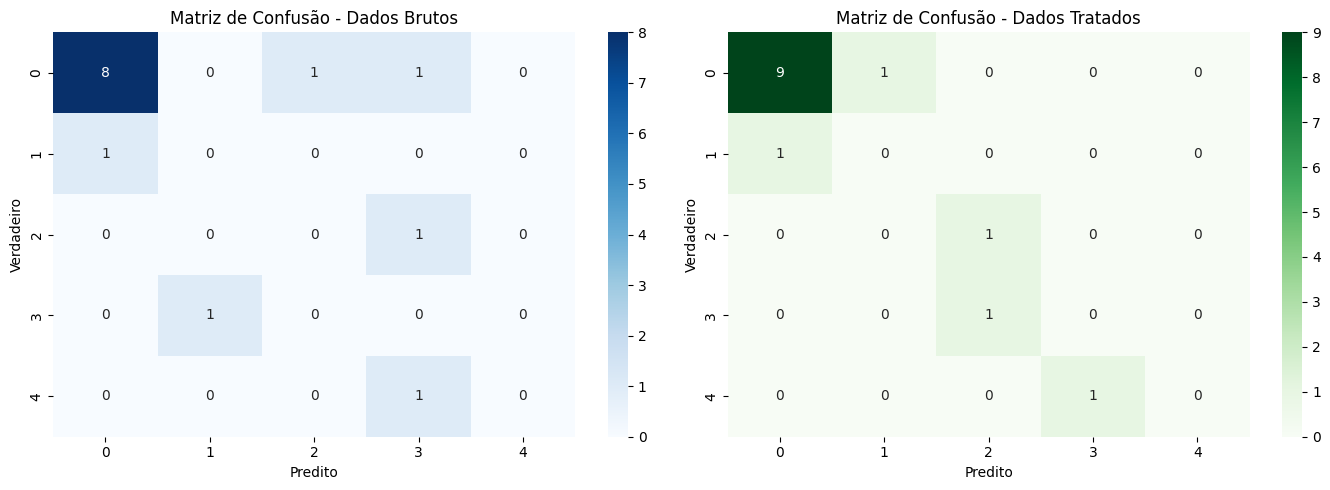

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(conf_matrix_raw, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Matriz de Confusão - Dados Brutos')
ax[0].set_xlabel('Predito')
ax[0].set_ylabel('Verdadeiro')

sns.heatmap(conf_matrix_treated, annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Matriz de Confusão - Dados Tratados')
ax[1].set_xlabel('Predito')
ax[1].set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()

## 10.2 Comparação das acurácias

In [62]:
print("Acurácia com dados brutos:", accuracy_raw)
print("Acurácia com dados tratados:", accuracy_treated)

Acurácia com dados brutos: 0.5714285714285714
Acurácia com dados tratados: 0.7142857142857143
